In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_error
from sklearn.model_selection import cross_val_score
from rfpimp import *
from sklearn.model_selection import train_test_split
from sklearn.base import clone


In [76]:
# from fastbook
def feature_importance(model, cols, fi, fistd = 0):
    return pd.DataFrame({'features':cols, 'importance':fi, 'importance_std': fistd}
                       ).sort_values('importance', ascending=False)

In [77]:
def fiplot(fi):
    sns.barplot(data=fi, y="features", x="importance")

In [2]:
hitters = pd.read_csv('data/Hitters.csv').dropna()
hitters.head()

,Unnamed: 0,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,...,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
1,-Alan Ashby,315,81,7,24,38,39,14,3449,835,...,321,414,375,N,W,632,43,10,475.0,N
2,-Alvin Davis,479,130,18,66,72,76,3,1624,457,...,224,266,263,A,W,880,82,14,480.0,A
3,-Andre Dawson,496,141,20,65,78,37,11,5628,1575,...,828,838,354,N,E,200,11,3,500.0,N
4,-Andres Galarraga,321,87,10,39,42,30,2,396,101,...,48,46,33,N,E,805,40,4,91.5,N
5,-Alfredo Griffin,594,169,4,74,51,35,11,4408,1133,...,501,336,194,A,W,282,421,25,750.0,A


In [3]:
hitters.columns

Index(['Unnamed: 0', 'AtBat', 'Hits', 'HmRun', 'Runs', 'RBI', 'Walks', 'Years',
       'CAtBat', 'CHits', 'CHmRun', 'CRuns', 'CRBI', 'CWalks', 'League',
       'Division', 'PutOuts', 'Assists', 'Errors', 'Salary', 'NewLeague'],
      dtype='object')

In [4]:
df = hitters[['AtBat', 'Hits', 'HmRun', 'Runs', 'RBI', 'Walks', 'Years',
       'CAtBat', 'CHits', 'CHmRun', 'CRuns', 'CRBI', 'CWalks', 'PutOuts', 'Assists', 'Errors', 'Salary']]

In [44]:
df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,632,43,10,475.0
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,880,82,14,480.0
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,200,11,3,500.0
4,321,87,10,39,42,30,2,396,101,12,48,46,33,805,40,4,91.5
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,282,421,25,750.0


In [5]:
df.shape

(263, 17)

In [71]:
df_train, df_test = train_test_split(df, test_size=0.3)

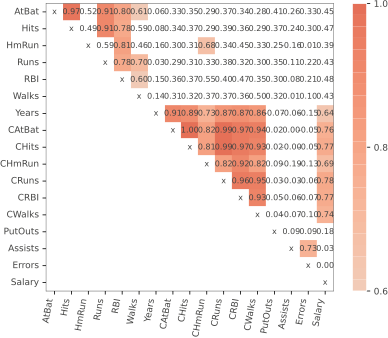

In [72]:
from rfpimp import plot_corr_heatmap
viz = plot_corr_heatmap(df_train, figsize=(7,5))
viz.save('images/corrheatmap.svg')
viz

In [73]:
X_train.shape

(197, 16)

In [74]:
X_train, y_train = df_train.drop('Salary',axis=1), df_train['Salary']
X_test, y_test = df_test.drop('Salary',axis=1), df_test['Salary']

rf = RandomForestRegressor(n_estimators=400, n_jobs=-1,
#                            max_features=X_train.shape[1]-1,
                            max_features=6,
                            min_samples_leaf=10, oob_score=True)
rf.fit(X_train, y_train)

RandomForestRegressor(max_features=6, min_samples_leaf=10, n_estimators=400,
                      n_jobs=-1, oob_score=True)

Without specifying a feature list, the default is to give you each column as an individual feature:

In [75]:
rf.score(X_train, y_train), rf.score(X_test, y_test), rf.oob_score_

(0.6696879919140988, 0.49736431115308133, 0.5584971332239773)

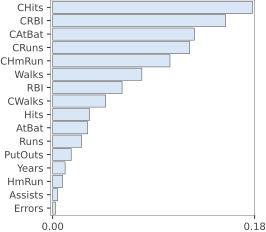

In [57]:
I = pd.DataFrame()

I['Feature'] = X_train.columns
I['Importance'] = rf.feature_importances_
I = I.sort_values('Importance', ascending=False)
I = I.set_index('Feature')
viz = plot_importances(I,
            title=None
)
viz

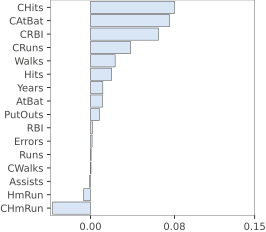

In [58]:
I = importances(rf, X_test, y_test)
viz = plot_importances(I)
viz.save('images/imp.svg')
viz

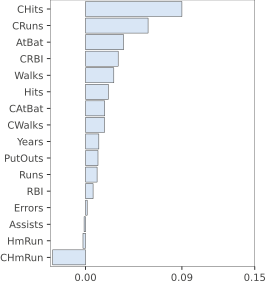

In [59]:
# compatibility test for >= 0.22.1
I = oob_importances(rf, X_test, y_test) # uses _generate_unsampled_indices() internally which changed in 0.22.1
plot_importances(I, vscale=1.2)

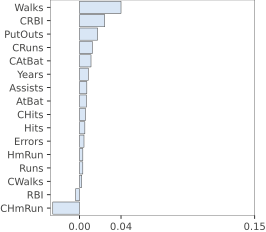

In [60]:
I = dropcol_importances(rf, X_train, y_train, X_test, y_test)
viz = plot_importances(I, title=None)
viz

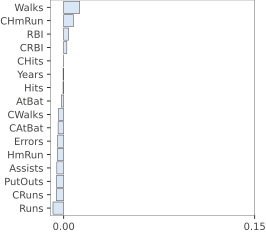

In [62]:
I = oob_dropcol_importances(rf, X_train, y_train)
viz = plot_importances(I, title=None)
viz

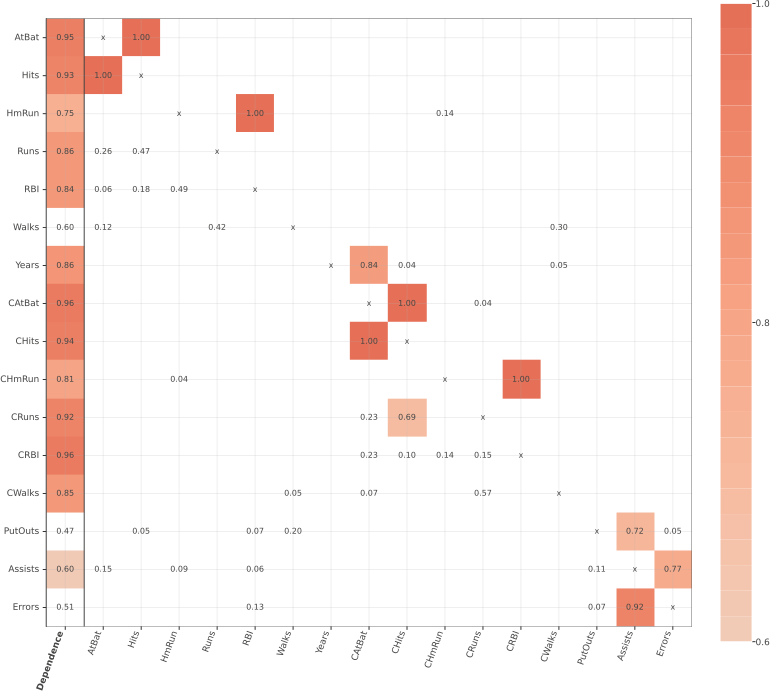

In [63]:
D = feature_dependence_matrix(X_train)
viz = plot_dependence_heatmap(D, figsize=(11,10))
viz

In [64]:
D['Dependence'].sort_values(ascending=False)

CAtBat     0.958624
CRBI       0.955559
AtBat      0.947801
CHits      0.937813
Hits       0.929926
CRuns      0.924455
Years      0.860016
Runs       0.855256
CWalks     0.845557
RBI        0.843149
CHmRun     0.806180
HmRun      0.745591
Assists    0.604435
Walks      0.597460
Errors     0.505707
PutOuts    0.465830
Name: Dependence, dtype: object

In [65]:
X_trainc = X_train.copy().drop(['Hits','RBI','CHits', 'Years', 'CWalks', 'CRBI'], axis=1)
y_trainc = y_train.copy()
X_testc = X_test.copy().drop(['Hits','RBI','CHits', 'Years', 'CWalks', 'CRBI'], axis=1)
y_testc = y_test.copy()

In [66]:
rf2 = RandomForestRegressor(n_estimators=400, n_jobs=-1,
#                            max_features=X_train.shape[1]-1,
                            max_features=5,
                            min_samples_leaf=8, oob_score=True)
rf2.fit(X_trainc, y_trainc)

RandomForestRegressor(max_features=5, min_samples_leaf=8, n_estimators=400,
                      n_jobs=-1, oob_score=True)

In [67]:
print(rf2.score(X_trainc, y_trainc), rf2.score(X_testc, y_testc), rf2.oob_score_ )

0.676582905088869 0.5729948612642188 0.5267462532143087


In [68]:
X_train.shape

(197, 16)

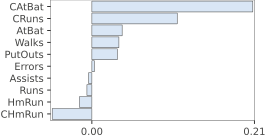

In [70]:
I = importances(rf2, X_testc, y_testc)
viz = plot_importances(I)
viz